<a href="https://colab.research.google.com/github/ravinasha/mac/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 2s 0us/step


In [10]:
(x_train, y_train), (x_test, y_test)

((array([[[[0.23137255, 0.24313725, 0.24705882],
           [0.16862745, 0.18039216, 0.17647059],
           [0.19607843, 0.18823529, 0.16862745],
           ...,
           [0.61960784, 0.51764706, 0.42352941],
           [0.59607843, 0.49019608, 0.4       ],
           [0.58039216, 0.48627451, 0.40392157]],
  
          [[0.0627451 , 0.07843137, 0.07843137],
           [0.        , 0.        , 0.        ],
           [0.07058824, 0.03137255, 0.        ],
           ...,
           [0.48235294, 0.34509804, 0.21568627],
           [0.46666667, 0.3254902 , 0.19607843],
           [0.47843137, 0.34117647, 0.22352941]],
  
          [[0.09803922, 0.09411765, 0.08235294],
           [0.0627451 , 0.02745098, 0.        ],
           [0.19215686, 0.10588235, 0.03137255],
           ...,
           [0.4627451 , 0.32941176, 0.19607843],
           [0.47058824, 0.32941176, 0.19607843],
           [0.42745098, 0.28627451, 0.16470588]],
  
          ...,
  
          [[0.81568627, 0.66666667, 0.37

In [4]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(x_train)


In [5]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


94765736/94765736 [==============================] - 0s 0us/step


In [6]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 258s 323ms/step - loss: 2.2795 - accuracy: 0.1348 - val_loss: 2.1581 - val_accuracy: 0.2120
Epoch 2/10
782/782 [==============================] - 298s 381ms/step - loss: 2.1969 - accuracy: 0.1542 - val_loss: 2.1162 - val_accuracy: 0.2320
Epoch 3/10
782/782 [==============================] - 256s 327ms/step - loss: 2.1754 - accuracy: 0.1657 - val_loss: 2.0654 - val_accuracy: 0.2519
Epoch 4/10
782/782 [==============================] - 256s 327ms/step - loss: 2.1649 - accuracy: 0.1690 - val_loss: 2.0370 - val_accuracy: 0.2567
Epoch 5/10
782/782 [==============================] - 254s 324ms/step - loss: 2.1582 - accuracy: 0.1722 - val_loss: 2.0483 - val_accuracy: 0.2590
Epoch 6/10
782/782 [==============================] - 257s 329ms/step - loss: 2.1491 - accuracy: 0.1743 - val_loss: 2.0258 - val_accuracy: 0.2655
Epoch 7/10
782/782 [==============================] - 254s 325ms/step - loss: 2.1447 - accuracy: 0.1752 - val_loss: 2.0506 -

In [7]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")


313/313 [==============================] - 41s 130ms/step - loss: 2.0072 - accuracy: 0.2660
Test accuracy: 0.2660


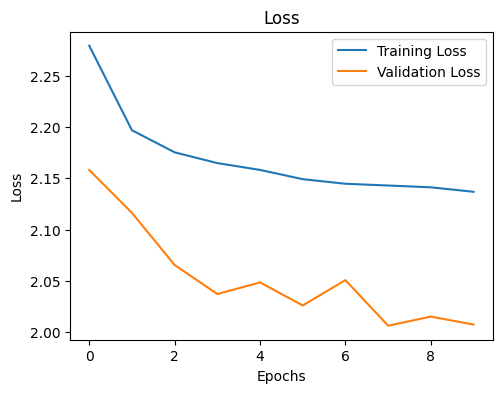

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

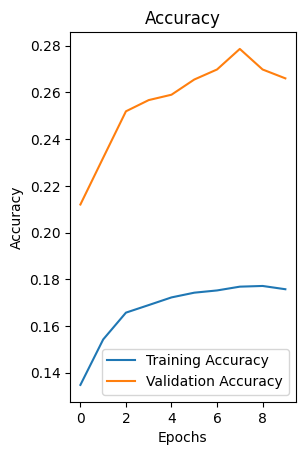

In [9]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()